# Load Packages

In [1]:
import pandas as pd

pd.options.display.float_format = '{:,.4f}'.format

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score

from srcs.utils import load_data, print_scores, get_scores, calculate_metrics
import time
import tracemalloc
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Model Evaluation


In [2]:
# use to store the scores of each model
results = []

## Template
```python
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Your Model Name")


naive_poisson = your_model()

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight=X_train["Exposure"])
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

```


## Intercept Only Model

In [3]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Intercept Only Model")
# Noting to specify, as it is an intercept only model
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    # Noting to specify, as it is an intercept only model,no need to train
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = y_train.mean() * np.mean(X_train["Exposure"]) * X_train["Exposure"]
    y_pred_test = y_train.mean() * np.mean(X_test["Exposure"]) * X_test["Exposure"]
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Intercept Only Model,test,MAE,0.0579,0.0009
3,Intercept Only Model,test,MaxError,3.9967,0.0022
5,Intercept Only Model,test,MeanPoissonDeviance,0.3893,0.0064
7,Intercept Only Model,test,PDE,0.0042,0.0001
11,Intercept Only Model,test,memory,0.0051,0.0000
9,Intercept Only Model,test,time,0.0039,0.0001
0,Intercept Only Model,train,MAE,0.0579,0.0002
2,Intercept Only Model,train,MaxError,3.9980,0.0001
4,Intercept Only Model,train,MeanPoissonDeviance,0.3893,0.0012
6,Intercept Only Model,train,PDE,0.0041,0.0000


## Naive Poisson Regression -- Baseline

In [4]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)
# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)
# End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Naive Poisson Regression--Baseline")
from sklearn.linear_model import PoissonRegressor

naive_poisson = PoissonRegressor()
# End of model specification

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson.fit(X_train, y_train, sample_weight=X_train["Exposure"])
    # End of model training

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # End of model testing

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,Naive Poisson Regression--Baseline,test,MAE,0.0568,0.0008
3,Naive Poisson Regression--Baseline,test,MaxError,3.9354,0.0002
5,Naive Poisson Regression--Baseline,test,MeanPoissonDeviance,0.3226,0.0029
7,Naive Poisson Regression--Baseline,test,PDE,0.0000,0.0000
11,Naive Poisson Regression--Baseline,test,memory,0.1980,0.0000
9,Naive Poisson Regression--Baseline,test,time,0.0870,0.0078
0,Naive Poisson Regression--Baseline,train,MAE,0.0568,0.0002
2,Naive Poisson Regression--Baseline,train,MaxError,3.9354,0.0002
4,Naive Poisson Regression--Baseline,train,MeanPoissonDeviance,0.3226,0.0008
6,Naive Poisson Regression--Baseline,train,PDE,0.0000,0.0000


## Naive Poisson Regression -- With Feature Engineering + Hyperparameter Tuning

In [5]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3



# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Naive Poisson Regression--With Feature Engineering + Hyperparameter Tuning")
from sklearn.linear_model import PoissonRegressor

# using random search to fine-tune the model
from sklearn.model_selection import RandomizedSearchCV

search_space = {
    "alpha": np.logspace(-5, 5, 100),
    "solver": ["lbfgs", "newton-cholesky"]
}

rscv = RandomizedSearchCV(PoissonRegressor(),
                          search_space,
                          n_iter=10,
                          cv=5,
                          scoring="neg_mean_absolute_error",
                          return_train_score=True,
                          n_jobs=-1,
                          random_state=42,
                          verbose=2).fit(X, y, sample_weight=X["Exposure"])
print(rscv.best_params_)
naive_poisson2 = PoissonRegressor(**rscv.best_params_)
# End of model specification


kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = naive_poisson2.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter 'solver' for estimator PoissonRegressor(). Valid parameters are: ['alpha', 'fit_intercept', 'max_iter', 'tol', 'verbose', 'warm_start'].

## XGBoost Poisson Regression

In [6]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3
df["VehAge4"] = df["VehAge"] ** 4
df["VehAge5"] = df["VehAge"] ** 5
df["VehAge6"] = df["VehAge"] ** 6


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3
df["DrivAge4"] = df["DrivAge"] ** 4
df["DrivAge5"] = df["DrivAge"] ** 5
df["DrivAge6"] = df["DrivAge"] ** 6


# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="xgboost Poisson Regression")
from xgboost import XGBRegressor

xgboost_poisson_model = XGBRegressor(objective="count:poisson")



kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()

    # TODO: enter your model training here
    model = xgboost_poisson_model.fit(X_train, y_train, sample_weight=X_train["Exposure"])

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

,Model,Type,Metric,Mean,Std
1,xgboost Poisson Regression,test,MAE,0.0542,0.0008
3,xgboost Poisson Regression,test,MaxError,3.9704,0.0188
5,xgboost Poisson Regression,test,MeanPoissonDeviance,0.2899,0.0032
7,xgboost Poisson Regression,test,PDE,0.0431,0.0018
11,xgboost Poisson Regression,test,memory,0.2405,0.0000
9,xgboost Poisson Regression,test,time,0.1963,0.0030
0,xgboost Poisson Regression,train,MAE,0.0529,0.0002
2,xgboost Poisson Regression,train,MaxError,3.9836,0.0044
4,xgboost Poisson Regression,train,MeanPoissonDeviance,0.2797,0.0009
6,xgboost Poisson Regression,train,PDE,0.0665,0.0008


## TODO:Your Model Here

In [7]:
from statsmodels.discrete.truncated_model import HurdleCountModel

In [8]:
# load the data
df = load_data()

# drop Area AS it can be inferred from Region
# drop ClaimAmount as we can not use it to predict the number of claims
df.drop(columns=["Area", "ClaimAmount"], inplace=True)

# clip as kaggler's notebook
df["ClaimNb"] = df["ClaimNb"].clip(upper=4)
df["Exposure"] = df["Exposure"].clip(upper=1)

"""
TODO: please specify the data preprocessing here
"""
df = pd.get_dummies(df, columns=["VehBrand", "VehPower", "VehGas", "Region"], drop_first=True)

df["VehAge"] = df["VehAge"].clip(upper=np.percentile(df["VehAge"], 97.5))
df["DrivAge"] = df["DrivAge"].clip(upper=np.percentile(df["DrivAge"], 97.5))
df["Density"] = np.log(df["Density"])

df["Density"] = np.log(df["Density"] + 1)
df["VehAge2"] = df["VehAge"] ** 2
df["VehAge3"] = df["VehAge"] ** 3


df["DrivAge2"] = df["DrivAge"] ** 2
df["DrivAge3"] = df["DrivAge"] ** 3



# VehBrand=='B12' , VehGas =='Regular', VehAge == 0.0,has a higher claim frequency as kaggler's notebook
df["B12RN"] = df["VehBrand_B12"] * df["VehGas_Regular"] * (df["VehAge"] == 0.0)
# df.loc[:, ["VehBrand_B12", "VehGas_Regular", "VehAge", "B12RN"]].head(10) 
# # End of data preprocessing


# do not change the fellowing code
X = df.drop(columns=['ClaimNb'])
y = df['ClaimNb']

# data integrity check
# make sure we do not drop some rows
assert X.shape[0] == load_data().shape[0]
# assert ClaimAmount is not in X, as ClaimAmount can not be used to predict the number of claims
assert "ClaimAmount" not in X.columns
# assert Frequency is not in X, as Frequency can not be used to predict the number of claims
assert "Frequency" not in X.columns

"""
TODO: please specify the model here
"""
scores = get_scores(model_name="Hurdle Model--With Feature Engineering")


kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    """Train the model"""
    tracemalloc.start()
    start = time.time()
    
    # TODO: enter your model training here
    model = HurdleCountModel(y_train, X_train, dist='poisson', zerodist='poisson')
    hurdle = model.fit(disp=False)
    
    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["train_time"].append(end - start)
    scores["train_memory"].append(peak / (1024 * 1024 * 1024))

    """Test the model"""
    start = time.time()
    tracemalloc.start()

    # TODO: enter your model testing here
    
    y_pred_train = hurdle.predict(X_train, which='mean')
    y_pred_test = hurdle.predict(X_test, which='mean')

    end = time.time()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    scores["test_time"].append(end - start)
    scores["test_memory"].append(peak / (1024 * 1024 * 1024))

    """Calculate the Metrics"""
    scores = calculate_metrics(scores, y_train, y_pred_train, y_test, y_pred_test)
results.append(scores)
print_scores(scores)

0it [00:00, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inve

,Model,Type,Metric,Mean,Std
1,Hurdle Model--With Feature Engineering,test,MAE,0.0568,0.0007
3,Hurdle Model--With Feature Engineering,test,MaxError,3.9613,0.0105
5,Hurdle Model--With Feature Engineering,test,MeanPoissonDeviance,0.3151,0.0026
7,Hurdle Model--With Feature Engineering,test,PDE,0.0132,0.0019
11,Hurdle Model--With Feature Engineering,test,memory,0.2425,0.0000
9,Hurdle Model--With Feature Engineering,test,time,0.0842,0.0052
0,Hurdle Model--With Feature Engineering,train,MAE,0.0568,0.0002
2,Hurdle Model--With Feature Engineering,train,MaxError,3.9692,0.0006
4,Hurdle Model--With Feature Engineering,train,MeanPoissonDeviance,0.3148,0.0010
6,Hurdle Model--With Feature Engineering,train,PDE,0.0136,0.0002


# Summary

In [12]:
df_results = pd.DataFrame()
for result in results:
    df_results = pd.concat([df_results, pd.DataFrame(result)])

df_results.groupby("model").mean().sort_values(by="test_MAE")

,train_MAE,test_MAE,train_MaxError,test_MaxError,train_MeanPoissonDeviance,test_MeanPoissonDeviance,train_PDE,test_PDE,train_time,test_time,train_memory,test_memory
model,,,,,,,,,,,,
xgboost Poisson Regression,0.0529,0.0542,3.9836,3.9704,0.2797,0.2899,0.0665,0.0431,1.5347,0.1963,0.2425,0.2405
Naive Poisson Regression--Baseline,0.0568,0.0568,3.9354,3.9354,0.3226,0.3226,0.0000,0.0000,0.1369,0.0870,0.2102,0.1980
Hurdle Model--With Feature Engineering,0.0568,0.0568,3.9692,3.9613,0.3148,0.3151,0.0136,0.0132,133.1832,0.0842,0.8799,0.2425
Intercept Only Model,0.0579,0.0579,3.9980,3.9967,0.3893,0.3893,0.0041,0.0042,0.0000,0.0039,0.0000,0.0051


In [10]:
df_results = pd.DataFrame()
for result in results:
    df_results = pd.concat([df_results, pd.DataFrame(result)])

df_results.groupby("model").mean().sort_values(by="test_MAE")

,train_MAE,test_MAE,train_MaxError,test_MaxError,train_MeanPoissonDeviance,test_MeanPoissonDeviance,train_PDE,test_PDE,train_time,test_time,train_memory,test_memory
model,,,,,,,,,,,,
xgboost Poisson Regression,0.0529,0.0542,3.9836,3.9704,0.2797,0.2899,0.0665,0.0431,1.5347,0.1963,0.2425,0.2405
Naive Poisson Regression--Baseline,0.0568,0.0568,3.9354,3.9354,0.3226,0.3226,0.0000,0.0000,0.1369,0.0870,0.2102,0.1980
Hurdle Model--With Feature Engineering,0.0568,0.0568,3.9692,3.9613,0.3148,0.3151,0.0136,0.0132,133.1832,0.0842,0.8799,0.2425
Intercept Only Model,0.0579,0.0579,3.9980,3.9967,0.3893,0.3893,0.0041,0.0042,0.0000,0.0039,0.0000,0.0051


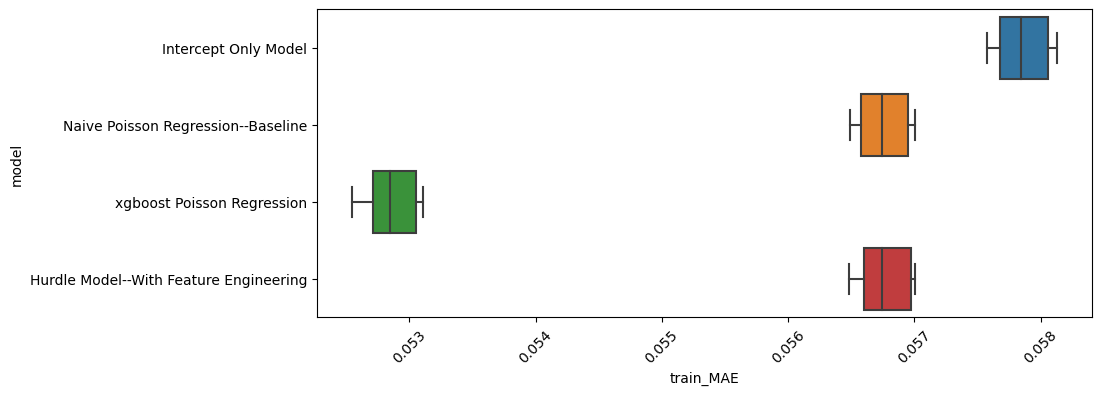

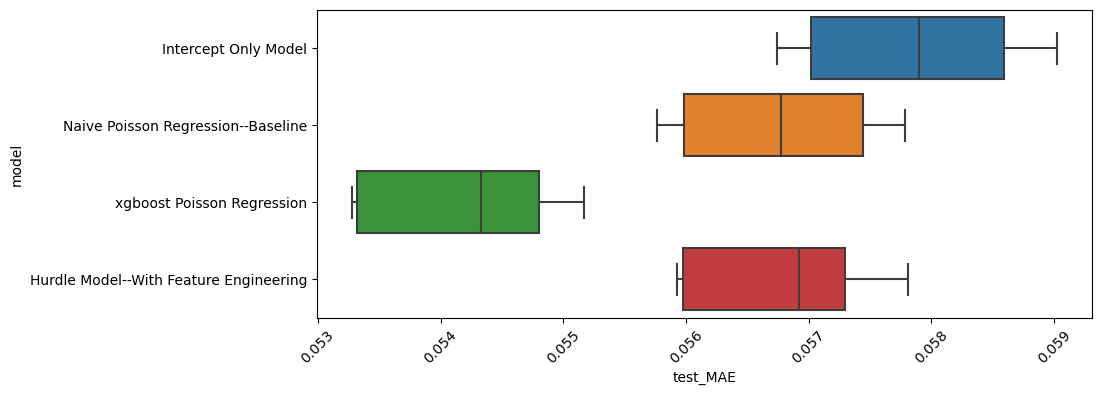

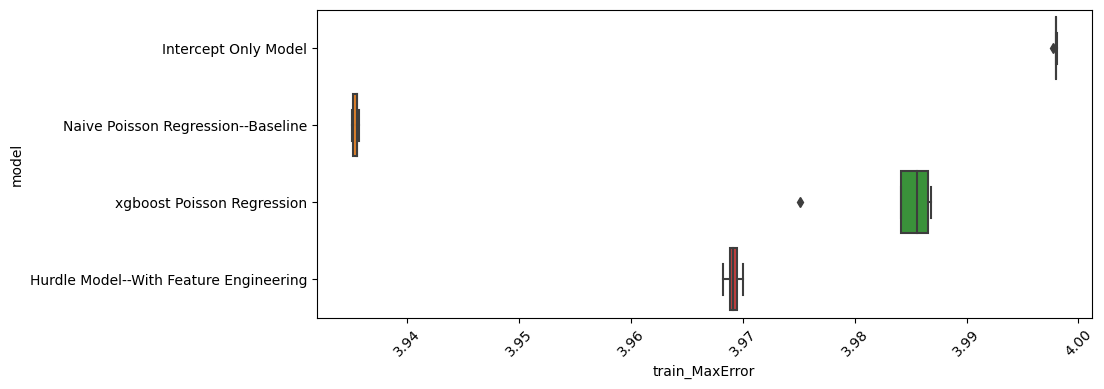

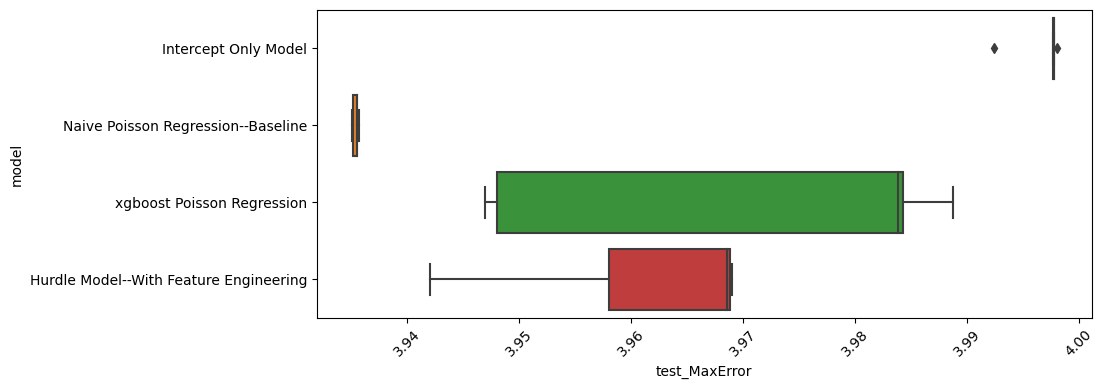

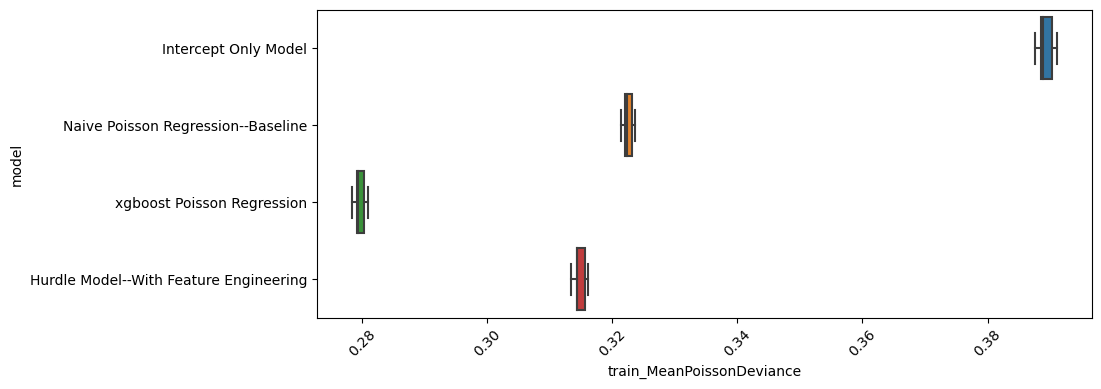

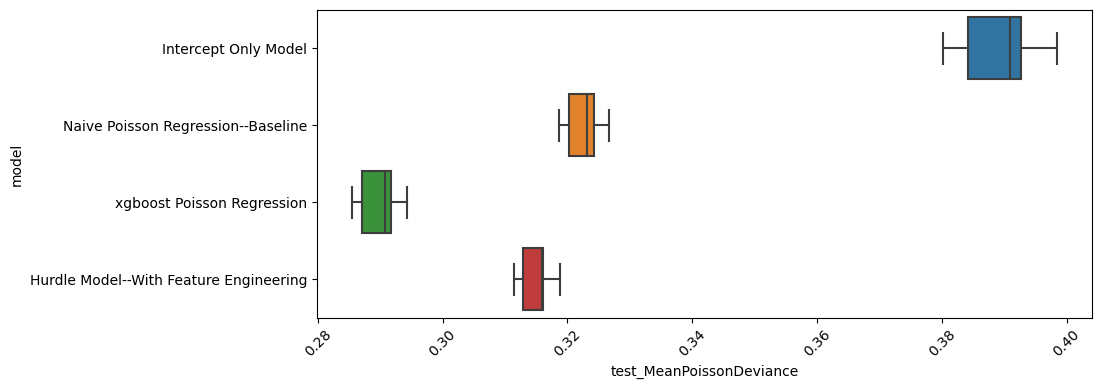

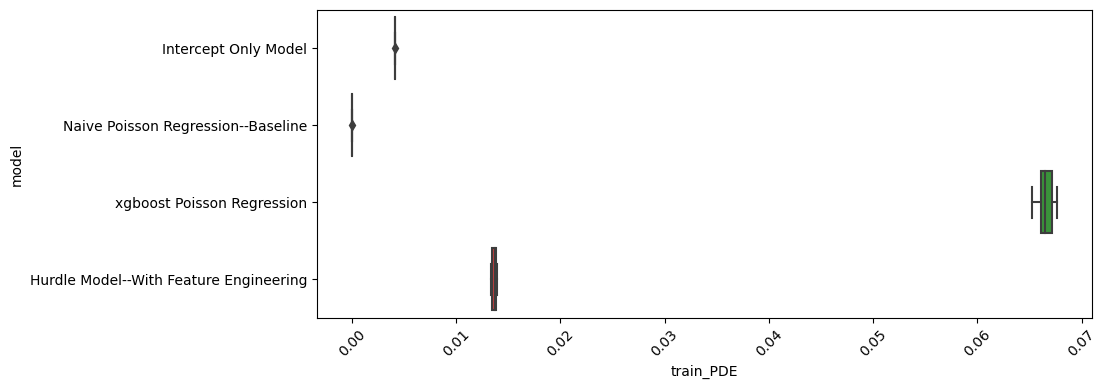

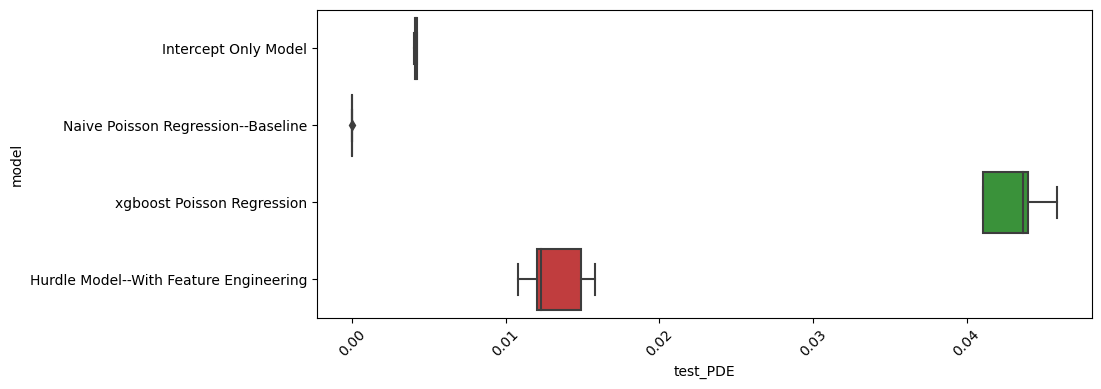

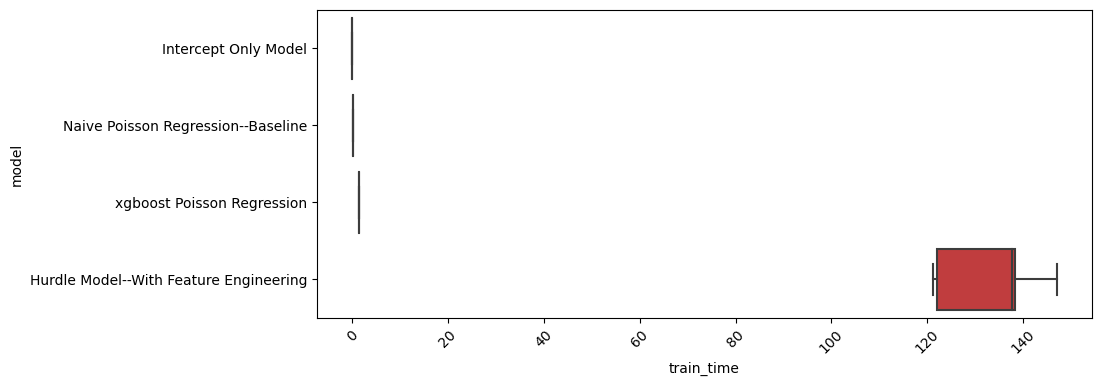

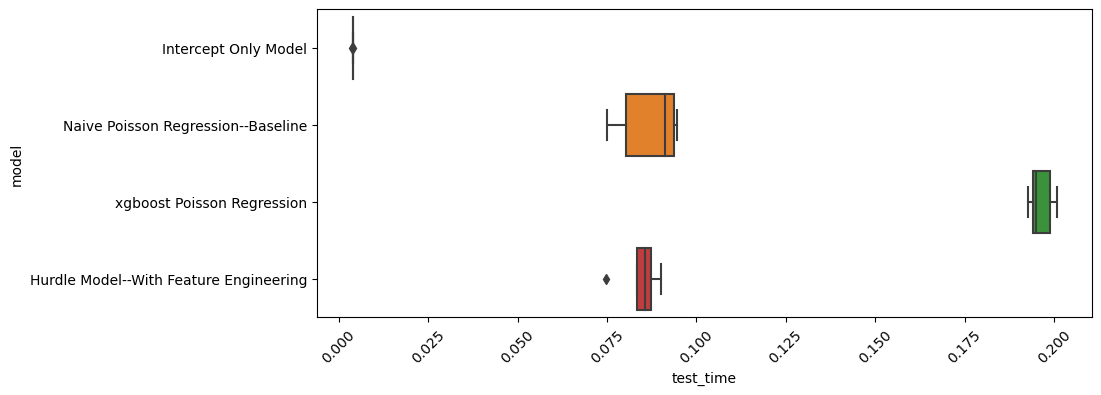

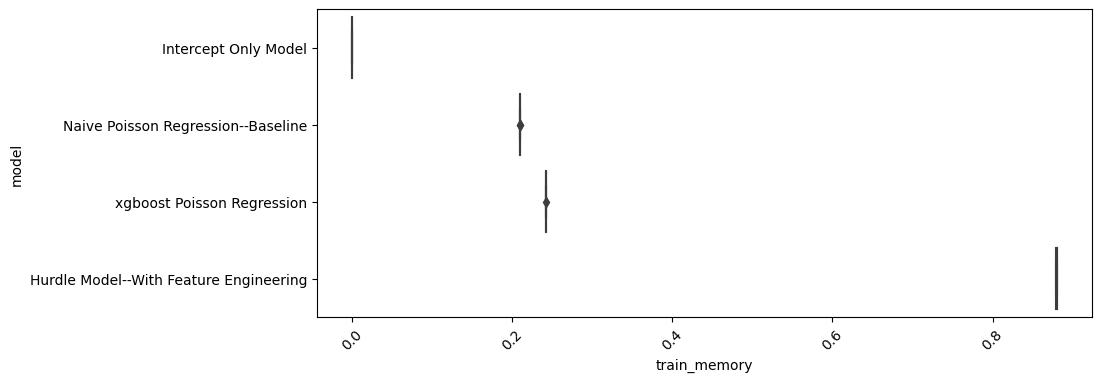

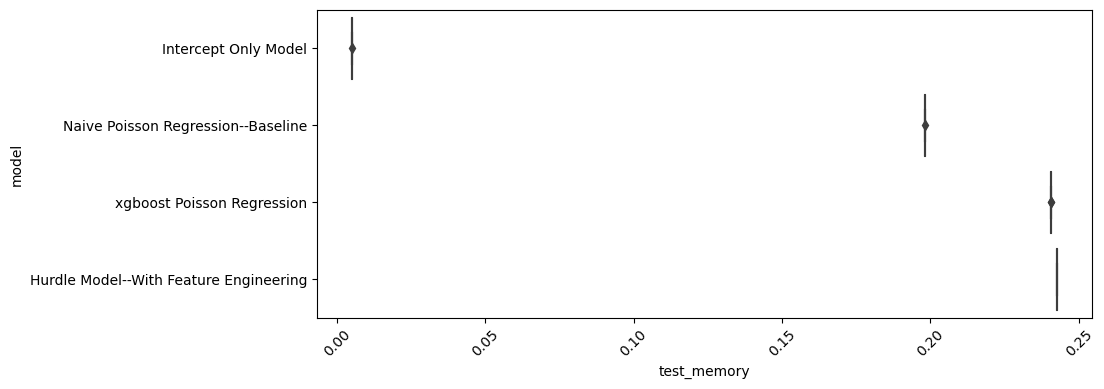

In [11]:
for metric in results[0].keys():
    if metric != "model":
        plt.figure(figsize=(10, len(results)))
        sns.boxplot(data=df_results, y="model", x=metric)
        plt.xticks(rotation=45)
        plt.show()


In [13]:
clear()